# main c1b code
This the main code that we are going to test here. Write your comments as soon as encouter the problem. Use markdown cell to insert your comments.  

In [1]:
%matplotlib inline
import c1b_util1 as c1b
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

#position of the window for the laptop
#not neccessary, but we keep it because another function is using it
pos = [480, 40, 1090, 800]
secyr = 86400*365;      # seconds per year 
f = 0.8                 # implicit/explicit factor 
jflag = 1               # 1 (plot J), 2 (plot Jnet)

# TEST: enter all 0 cases
experm = c1b.set_experim(); 
print 'exp=',experm
region = experm[0]; project = experm[1]; experim = experm[2]
print region, project,experim

Regions:
[0] test
[1] alaska
Type region#: 0
test
--------------------
Projects: 
[0] easy
[1] rock
[2] ice
Type project#: 0
easy
----------
Experiments =
[0] e1 SS, UB = fixed Ts, LB = fixed Jb, source=0
[1] e2 SS with exponential source term
[2] e3 SS with composite material
[3] e4 SS with temp.-dependent K and Cp
[4] e5 instantaneous step change
[5] e6 periodic surface temp
[6] e7 triangle heating pulse
Type experiment#: 0
('test', 'easy', 'e1')
exp= ('test', 'easy', 'e1')
test easy e1


next we skip the lines 78-83 in the Gary's code. Make sure to corresct this function in the utils file. Assign 'return experiment'.

In [5]:
experm_file ='projects/'+region+'/'+project+'/'+experim+'/'+experim+'_namelist.txt'
fid = open(experm_file,'r')
header = fid.readline()
blank = fid.readline()
Lname_s = fid.readline()
Tsname_s = fid.readline()
Pname_s = fid.readline()
Sname_s = fid.readline()
fid.close()
#print header, blank, Lname_s, Tsname_s, Pname_s, Sname_s
print experm_file
Lname = c1b.extract_str(Lname_s) #  physical-layers file
Tsname = c1b.extract_str(Tsname_s) #  Ts-history file
Pname = c1b.extract_str(Pname_s) # thermal property m-file
Sname = c1b.extract_str(Sname_s) #  source m-file
print Lname, Tsname, Pname, Sname


lib_file = 'projects/'+region+'/library/layers/'+Lname+'.txt' 
print '\nReading the entire file at once ignoring commented lines.'
wk = np.loadtxt(lib_file, comments='%', delimiter=',', unpack=False)
print wk
zfuL = wk[:,0]          # upper boundary of this physical layer
zfdL = wk[:,1]          # lower boundary of this physical layer
typL = wk[:,2]          # type of material for this layer
nL   = wk[:,3]          # number of control volumes for this layer

projects/test/easy/e2/e2_namelist.txt
e2_layer Ts_1 Tprop_1 source_2

Reading the entire file at once ignoring commented lines.


ValueError: invalid literal for float(): 0    1  1   1.5

I am not sure what N should be equal too. 
**Brielle, please check that Z_grid1 is working properly by running matlab code**

input


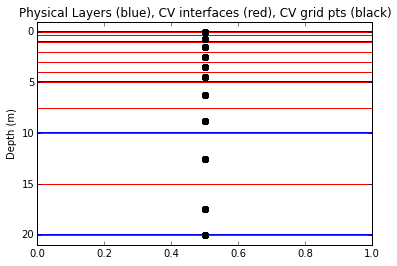

output
zf= [  0.           0.33333333   1.           2.           3.           4.           5.
   7.5         10.          15.          20.        ] z= [  0.           0.66666667   1.5          2.5          3.5          4.5
   6.25         8.75        12.5         17.5         20.        ] Dz= [ 0.33333333  0.66666667  1.          1.          1.          1.          2.5
  2.5         5.          5.        ]
zf= (11L,) z= (11L,) Dz= (10L,)

dz= [  1.00000000e-10   6.66666667e-01   8.33333333e-01   1.00000000e+00
   1.00000000e+00   1.00000000e+00   1.75000000e+00   2.50000000e+00
   3.75000000e+00   5.00000000e+00] varep= [ 0.          0.5         0.6         0.5         0.5         0.5
  0.71428571  0.5         0.66666667  0.5       ] typ= [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
dz= (10L,) varep= (10L,) typ= (10L,)
N= 10
zz= [  0.           0.66666667   1.5          2.5          3.5          4.5
   6.25         8.75        12.5         17.5       ]


In [3]:
print 'input'
#print zfuL, zfdL, typL, nL
[zf,z,Dz,dz,varep,typ,N]=c1b.Z_grid1(zfuL, zfdL, typL, nL, pos)
zz = z[0:N]
spaceP = [zf,z,Dz,dz,varep];
#print spaceP
print 'output'
print 'zf=',zf,'z=',z,'Dz=',Dz
print 'zf=',np.shape(zf),'z=',np.shape(z),'Dz=',np.shape(Dz)
print ''
print 'dz=',dz,'varep=',varep,'typ=',typ
print 'dz=',np.shape(dz),'varep=',np.shape(varep),'typ=',np.shape(typ)
print 'N=',N
print 'zz=',zz

Note: lines 124-172 in matlab. Here loadtxt removes the neccessity of using extract_num and combined two switch statements into one. 

In [4]:

param_file = 'projects/'+region+'/'+project+'/'+experim+'/'+experim+'_param.txt'

if region == 'alaska':
    # Note that I have not check this case
    wk = np.loadtxt(param_file, comments='%', delimiter=',', unpack=False)
    imat0= wk[0]; matfrac0 = wk[1]; Kg25 = wk[2]; 
    phi0 = wk[3]; qb0 = wk[4]
    
    testP = [];
    
    
    imat = imat0*np.ones(N-1)
    matfrac = matfrac0*np.ones(N-1)
    phi = phi0*np.ones(N-1)
    Mw0 = float('nan')*np.ones(N-1)
    materialC = [imat,matfrac,Kg25,phi,Mw0]  
    
elif region == 'test':
    wk = np.loadtxt(param_file, comments='%', delimiter=',', unpack=False)
    T0= wk[0]; dT = wk[1]; period = wk[2]; qb0 = wk[3]
    
    testP = [experim, T0,dT,period];
    print testP
    materialC = [typ]
    print materialC
else:
    testP = [];
print wk

['e1', -10.0, 0.0, 0.0]
[array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])]
[-10.   0.   0.  50.]


**Assigment for Brielle.** Need to read Tsmethod from file

In [5]:
init_file = 'projects/'+region+'/library/Ts/'+Tsname+'.txt'
#init_file = 'projects/'+region+'/library/Ts/Ts_2.txt'
#init_file = 'projects/'+region+'/'/Ts/'+Tsname+'+.txt'
#print Tsname
#wk = np.loadtxt(init_file, skiprows=4,unpack=False)
#print wk

Tsmethod = 'linear'
#  Forced Tsmethod to equal linear

wk = np.loadtxt(init_file, skiprows=4,unpack=False)

#Tsmethod = 'linear' # Note: need to read this from file
tauA = wk[:,0]
tsA = wk[:,1]
print tauA,tsA

[  0.   5.  10.] [-10. -10. -10.]


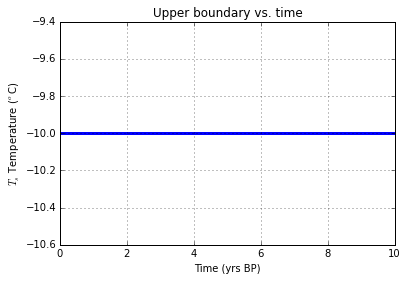

In [6]:
myplot=plt.plot(tauA,tsA); 
plt.xlabel('Time (yrs BP)')
plt.ylabel('$T_s$ Temperature ($^o$C)')
plt.title('Upper boundary vs. time')
plt.setp(myplot, 'color', 'b', 'linewidth', 3.0)
plt.grid(); plt.show()

In [7]:
# set lower boundary condition, qb(tau)

tauB = tauA                       # time BP (yrs)
qbB = -qb0/1000*np.ones(tauB.size); # convert to W/m^2 and change to CV sign convention
qbmethod = 'nearest';                  # interpolation method

# > Set initial conditions -----------
# set initial time (tau0) to oldest age found in upper BC file

tau0 = max(tauA); t = 0;
# find BCs at tau0

Ts_func = interpolate.interp1d(tauA,tsA,qbmethod)
Ts = Ts_func(tau0)
qb_func = interpolate.interp1d(tauB,qbB,qbmethod);
qb = qb_func(tau0)
bcP = [Ts,qb];


#  Is there something wrong with spaceP?

**Note:** Tprop_1 requires three inputs (currently it has only materialC as an input). Also there was a bug in the K_eff with parentathesis

In [8]:
# find source term for each CV; calling sorce_* function

[QS, Sfac,sourceP] = c1b.feval(Sname,spaceP,N,t)
#print [QS, Sfrac,sourceP]
#  4 elements in MATLAB vs 10 in Python
# find 1st-guess thermal properties at grid points
spinup = 1;
T = Ts*np.ones(N);     # (assume T = Ts for entire profile)
# calling Tprop_1 function 
[K,rho,Cp,C,diagC] = c1b.feval(Pname,T,materialC,spinup);
#print [K,rho,Cp,C,diagC]

# find effective conductivity at interfaces (except bottom interface)
Ke = c1b.K_eff(N,K,varep);

# store thermal properties in cell array TpropP

TpropP = [K,rho,Cp,Ke];
#print 'TpropP=',TpropP
#Is there something wrong with TpropP?


In [9]:
print '\nSelect how the initial T-field will be established:' 
print '   [1] input from file '
print '   [2] numerical calculation assuming steady-state conditions'
print '   [3] analytic calculation (note: works only for 3)'
init_opt = input('  Type [1,2 or 3]: ')

T = c1b.init_T(N,t,spaceP,TpropP,QS,sourceP,bcP,testP,init_opt);

#print N,t,spaceP,TpropP,QS,sourceP,bcP,testP,init_opt
#  A ValueError appears after I type in 3.



Select how the initial T-field will be established:
   [1] input from file 
   [2] numerical calculation assuming steady-state conditions
   [3] analytic calculation (note: works only for 3)
  Type [1,2 or 3]: 3
e1
-10.0 [  0.           0.66666667   1.5          2.5          3.5          4.5
   6.25         8.75        12.5         17.5       ] 0.05 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


**Note:** zz array 2 elements shorter than T. This makes it hard to plot vs T. Needs to be fixed

e1
-10.0 [  0.           0.66666667   1.5          2.5          3.5          4.5
   6.25         8.75        12.5         17.5       ] 0.05 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


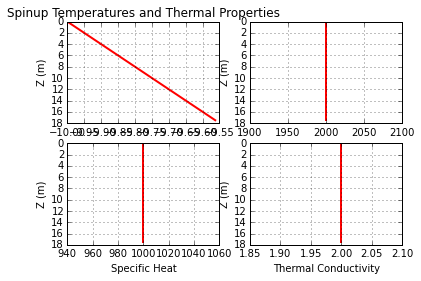

e1
-10.0 [  0.           0.66666667   1.5          2.5          3.5          4.5
   6.25         8.75        12.5         17.5       ] 0.05 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


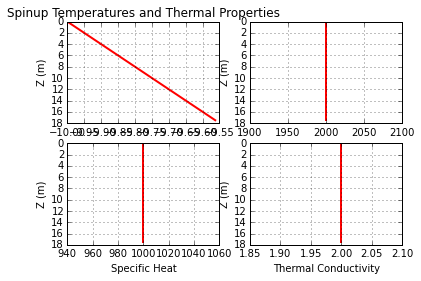

e1
-10.0 [  0.           0.66666667   1.5          2.5          3.5          4.5
   6.25         8.75        12.5         17.5       ] 0.05 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


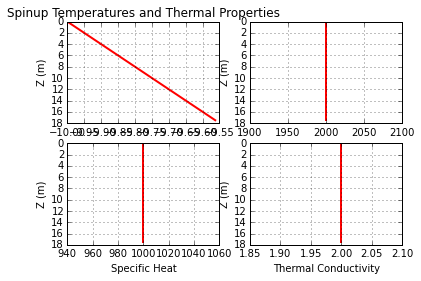

e1
-10.0 [  0.           0.66666667   1.5          2.5          3.5          4.5
   6.25         8.75        12.5         17.5       ] 0.05 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


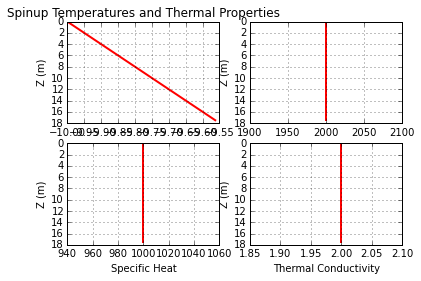

e1
-10.0 [  0.           0.66666667   1.5          2.5          3.5          4.5
   6.25         8.75        12.5         17.5       ] 0.05 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


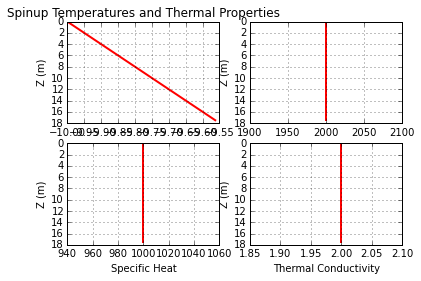

In [10]:
kmax=6;# should be 6
for k in range(1,kmax):
    Tl = T; rhol = rho; Cpl  = Cp; Kl = K
    #print Tl, rhol, Cpl, Kl
    
    
    [K,rho,Cp,C,diagC] = c1b.feval(Pname,T,materialC,spinup)
    #print Pname,T,materialC,spinup
    Ke = c1b.K_eff(N,K,varep);
    TpropP = [K,rho,Cp,Ke];
    T = c1b.init_T(N,t,spaceP,TpropP,QS,sourceP,bcP,testP,init_opt);
    #print T, N, t, spaceP, TpropP, QS, sourceP, bcP, testP, init_opt
    if k < kmax:
        lc = 'r'; lw = 2.0;
    else:
        lc = 'b'; lw = 2.0;
    
    plt.figure(1)
    plt.subplot(221)
    myplot=plt.plot(T, zz)
    plt.gca().invert_yaxis()
    plt.xlabel('Initial Temperature Field ($^\circ$C)')
    plt.ylabel('Z (m)')
    plt.title('Spinup Temperatures and Thermal Properties')
    plt.setp(myplot, 'color', lc, 'linewidth', lw)
    plt.grid(); 
    
    #print 'rho,zz=',rho,zz
    plt.subplot(222)
    myplot=plt.plot(rho, zz)
    plt.gca().invert_yaxis()    
    plt.xlabel('Density')
    plt.ylabel('Z (m)')
    plt.setp(myplot, 'color', lc, 'linewidth', lw)
    plt.grid(); 
   
    #print 'Cp,zz=',Cp,zz
    plt.subplot(223)
    myplot=plt.plot(Cp, zz)
    plt.gca().invert_yaxis()    
    plt.xlabel('Specific Heat')
    plt.ylabel('Z (m)')
    plt.setp(myplot, 'color', lc, 'linewidth', lw)
    plt.grid(); 
    
    #print 'K,zz=',K,zz
    plt.subplot(224)
    myplot=plt.plot(K, zz)
    plt.gca().invert_yaxis()    
    plt.xlabel('Thermal Conductivity')
    plt.ylabel('Z (m)')
    plt.setp(myplot, 'color', lc, 'linewidth', lw)
    plt.grid(); 
    
    plt.show()
    
    # spinup residuals
    dT = T - Tl; drho = rho - rhol; dCp = Cp - Cpl; dK = K - Kl;

#print 'Maximum spinup residuals: '    
#print max(dT), max(drho), max(dCp), max(dK)
#  A ValueError appears again in this cell

In [11]:
# save initial fields

Tinit = T;
rho0  = rho;

# for permafrost, assume the mass of pore water (ice+unfrozen) remains fixed 
# with time.  Grab the value of Mw at the end of the spinup stage and store it
# in materialC.
if region == 'alaska':
    Mw0          = diagC[1];
    phi_i0       = diagC[2];
    phi_u0       = diagC[3];
    phi_a0       = diagC[4];
    materialC[5] = Mw0;

# show initial thermal properties
kappa = K / C;        # thermal diffusivity


lines 338-407 of the matlab ode

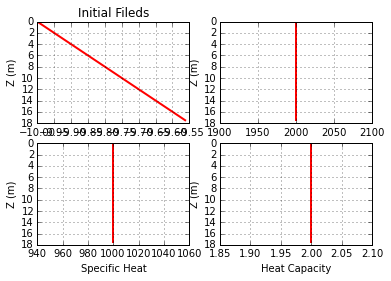

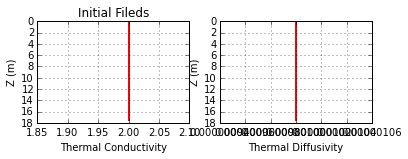

In [12]:
plt.figure(1)
plt.subplot(221)
myplot=plt.plot(T, zz)
plt.gca().invert_yaxis()

plt.xlabel('Initial Temperature Field ($^\circ$C)')
plt.ylabel('Z (m)')
plt.title('Initial Fileds')
plt.setp(myplot, 'color', lc, 'linewidth', lw)
plt.grid(); 

plt.subplot(222)
myplot=plt.plot(rho, zz)
plt.gca().invert_yaxis()    
plt.xlabel('Density')
plt.ylabel('Z (m)')
plt.setp(myplot, 'color', lc, 'linewidth', lw)
plt.grid(); 

#print 'Cp,zz=',Cp,zz
plt.subplot(223)
myplot=plt.plot(Cp, zz)
plt.gca().invert_yaxis()    
plt.xlabel('Specific Heat')
plt.ylabel('Z (m)')
plt.setp(myplot, 'color', lc, 'linewidth', lw)
plt.grid(); 
  
#print 'K,zz=',K,zz
plt.subplot(224)
myplot=plt.plot(C/1e06, zz)
plt.gca().invert_yaxis()    
plt.xlabel('Heat Capacity')
plt.ylabel('Z (m)')
plt.setp(myplot, 'color', lc, 'linewidth', lw)
plt.grid(); 
 
plt.show()
#  This part does not match MATLAB code

plt.figure(1)
plt.subplot(221)
myplot=plt.plot(K, zz)
plt.gca().invert_yaxis()    
plt.xlabel('Thermal Conductivity')
plt.ylabel('Z (m)')
plt.setp(myplot, 'color', lc, 'linewidth', lw)
plt.title('Initial Fileds')
plt.grid(); 

plt.subplot(222)
myplot=plt.plot(kappa, zz)
plt.gca().invert_yaxis()    
plt.xlabel('Thermal Diffusivity')
plt.ylabel('Z (m)')
plt.setp(myplot, 'color', lc, 'linewidth', lw)
plt.grid(); 

if region == 'alaska':
    # this part should be improved/ leaving it for now
    plt.subplot(223)
    myplot=plt.plot(phi, zz)
    #hold on
    #plot(phi_i0,zz,'linewidth',1.5,'color','b')
    #plot(phi_u0,zz,'linewidth',1.5,'color','r')
    #plot(phi_i0+phi_u0,zz,'linestyle','--','color','g')

    plt.gca().invert_yaxis()    
    plt.xlabel('Volume Fractions')
    plt.ylabel('Z (m)')
    plt.setp(myplot, 'color', lc, 'linewidth', lw)
    plt.grid(); 
#    Mw0          = diagC[1];
#  NameError:  name 'lc' is not defined

maltab code 412-428

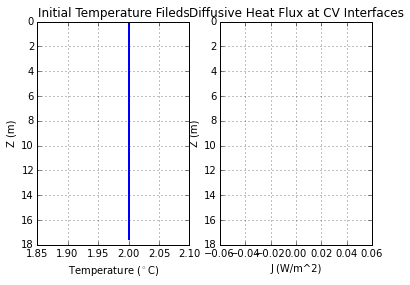

In [13]:
Kedz = Ke / dz;
J = float('nan')*np.ones(N+1)
for k in range(1,N):
    J[k] = -Kedz[k] * (T[k] - T[k-1])
J[N] = qb

#plt.figure(1)
ax1 = plt.subplot(121)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Z (m)')
plt.setp(ax1.plot(K, zz), 'color', 'b', 'linewidth', 2)
plt.gca().invert_yaxis() 
plt.title('Initial Temperature Fileds')
plt.grid(); 

ax2 = plt.subplot(122, sharey=ax1) # aligns the y axis similarly
J = float('nan')*np.ones(N+1)
plt.setp(ax2.plot(J, z), 'color', 'b', 'linewidth', 2)
plt.ylabel('Z (m)')

if jflag == 1:
    plt.xlabel('J (W/m^2)')
    plt.title('Diffusive Heat Flux at CV Interfaces')
else:
    plt.xlabel('$J_{net}$ (W/m^2)')
    plt.title('Net Diffusive Heat Flux for each CV')
plt.grid(); 

# Setup time grid
# estimate maximum time step (dt) that satisfies numerical stability

sfac = np.zeros(N);

#Note is how the old code looked, do not remove it
#for k in range(1,N):
    #sfac[k] = dz[k]*Dz[k]/(2*(1-f)*kappa[k]);
#new version
for k in range(0,N):
    sfac[k] = (dz[k]*Dz[k])/(2*(1-f)*kappa[k])
sfac = sfac / secyr
#print 'dt should be less than ',min(sfac[1:N]),' (yrs) to guarantee numerical stability.'

# input parameters defining time grid
#print ''
#print 'Initial Time = ',tau0, 'yrs BP'
#print ''
#dtyr = input('Type time step [yrs]: ')

dtyr = 0.015
Nt = int(round(tau0/dtyr))
tgrid = np.zeros(Nt+1);

for i in range(1,Nt+1): # this could be vectorized
    tgrid[i] = i*dtyr; 
    

#dt_plot = input('Plot how often [yrs]: ')
dt_plot = 2
Ntplot  = int(round(dt_plot/dtyr))



Above is an example of how we can get rid of the for loop by vectorizing the operation

while loop lines 487-585

i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9
i= 10
i= 11
i= 12
i= 13
i= 14
i= 15
i= 16
i= 17
i= 18
i= 19
i= 20
i= 21
i= 22
i= 23
i= 24
i= 25
i= 26
i= 27
i= 28
i= 29
i= 30
i= 31
i= 32
i= 33
i= 34
i= 35
i= 36
i= 37
i= 38
i= 39
i= 40
i= 41
i= 42
i= 43
i= 44
i= 45
i= 46
i= 47
i= 48
i= 49
i= 50
i= 51
i= 52
i= 53
i= 54
i= 55
i= 56
i= 57
i= 58
i= 59
i= 60
i= 61
i= 62
i= 63
i= 64
i= 65
i= 66
i= 67
i= 68
i= 69
i= 70
i= 71
i= 72
i= 73
i= 74
i= 75
i= 76
i= 77
i= 78
i= 79
i= 80
i= 81
i= 82
i= 83
i= 84
i= 85
i= 86
i= 87
i= 88
i= 89
i= 90
i= 91
i= 92
i= 93
i= 94
i= 95
i= 96
i= 97
i= 98
i= 99
i= 100
i= 101
i= 102
i= 103
i= 104
i= 105
i= 106
i= 107
i= 108
i= 109
i= 110
i= 111
i= 112
i= 113
i= 114
i= 115
i= 116
i= 117
i= 118
i= 119
i= 120
i= 121
i= 122
i= 123
i= 124
i= 125
i= 126
i= 127
i= 128
i= 129
i= 130
i= 131
i= 132
i= 133
J= [  nan -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05] z= [  0.           0.66666667   1.5          2.5          3.5          4.5
   6.25         8.75        12.

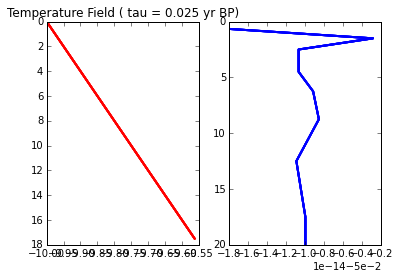

In [17]:
import time

spinup = 0; i = 1; tau = tau0; qbn = qb; Tn = T;
J = float('nan')*np.ones(N+1); Jnet = float('nan')*np.ones(N);

# ------ Begin Time Loop -------->

while tau > 0 and i < 668: # looks like it whould also check i too
    print 'i=',i
    tau = tau0 - tgrid[i]
    t   = secyr * tgrid[i]
    dt  = secyr * dtyr
    #print 'tgrid[i]=',tgrid[i], 'i=',i, 'tau=',tau
    if tau < 0:  
        print 'qb=',qb,'ts=',Ts,'tau=',tau
        break
# find BCs
    Ts_func = interpolate.interp1d(tauA,tsA,qbmethod)
    Ts = Ts_func(tau)
    qb_func = interpolate.interp1d(tauB,qbB,qbmethod)
    qb = qb_func(tau)
    if i == 667:  
        print 'qb=',qb,'ts=',Ts,'tau=',tau
# find thermal properties at the grid points

    [K,rho,Cp,C,diagC] = c1b.feval(Pname,T,materialC,spinup);
    if region == 'alaska':
        Mw          = diagC[1];
        phi_i       = diagC[2];
        phi_u       = diagC[3];
        phi_a       = diagC[4];
        dphiudT     = diagC[5];

# find effective conductivity at interfaces (except bottom interface)
    Ke = c1b.K_eff(N,K,varep);

# store thermal properties in cell array TpropP
    TpropP = [K,rho,Cp,Ke];
    
# find source term
    #[QS,Sfrac,sourceP] = c1b.feval(Sname, N,spaceP,t)
    #print QS,sourceP,Sname,N,spaceP,t
# find DE coefficients
    dtf   = dt*f; dt1mf = dt*(1-f); Kedz  = Ke / dz;
# Note that shape of Dz is one number less, needs to be fixed
    #print Dz, C
    if region == 'alaska':
        rhow = 1000;
        Lf   = 3.34e05;
        LH   = rhow * Lf * dphiudT;
        DzC  = Dz * (C + LH);
    else: 
        DzC  = Dz * C; # this is wrong should be Dz * C, leaving it for now

    [aU,aP,aD,aUp,aPp,aDp,b] = c1b.DE_coefs_1b(N,dtf,dt1mf,DzC,Kedz,QS,qb,qbn);
     
# find new temperature field
    T = c1b.TDMA(N,aU,aP,aD,aUp,aPp,aDp,b,Tn,Ts);
   
# find diffusive heat flux across each interface
    
    for k in range(1,N):
        J[k] = -Kedz[k] * (T[k] - T[k-1]);
        
    J[N] = qb;
   
    # find the net flux across CV interfaces
    for k in range(1,N):
        Jnet[k] = J[k+1] - J[k];
      
    # plot temperatures
    
    
    junk = float(i)/float(Ntplot);
   
    #print junk
    #print np.floor(junk)
    
        
    if junk == np.floor(junk):   # NOT a 100% sure that it is right
        ax1 = plt.subplot(121)
        plt.title('Temperature Field ( tau = '+str(tau)+' yr BP)')
        #print np.size(T[1:N]),np.size(zz)
        plt.setp(ax1.plot(T, zz), 'color', 'r', 'linewidth', 2)
        plt.gca().invert_yaxis()
        #print jflag, np.size(Jnet[1:N]),np.size(zz)
        ax2 = plt.subplot(122)
        if jflag == 1:
            plt.setp(ax2.plot(J, z), 'color', 'b', 'linewidth', 2)
            print 'J=',J,'z=',z
        elif jflag == 2:
            plt.setp(ax2.plot(Jnet, zz), 'color', 'r', 'linewidth', 2)
        plt.gca().invert_yaxis()
        #if region == 'alaska':
            #print 'min(phi_a) = ',min(phi_a)
            #print 'max(phi_a) = ',max(phi_a)
    
        #time.sleep(5)    # pause 5 seconds

# store values for next time step

    qbn = qb; Tn = T; i = i+1;
   
    #raw_input('Press any key to continue: ')

# IndexError


[  0.00000000e+00  -1.77635684e-15   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.77635684e-15
   0.00000000e+00   0.00000000e+00]


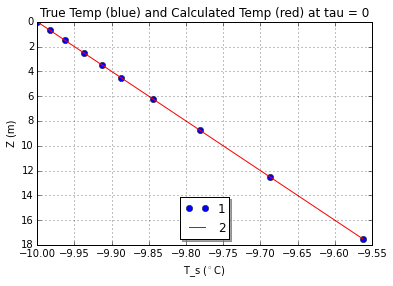

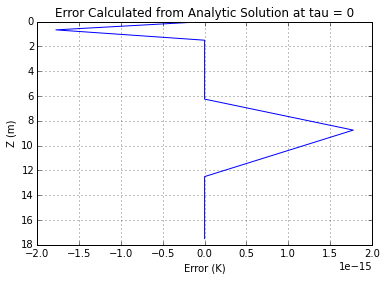

In [18]:
#print Tinit[1:N], zz
if region == 'alaska':
    ax1 = plt.subplot(221)
    plt.title('Initial State (solid), Final State (dashed)')
    myplot=ax1.plot(Tinit, zz, 'b', T, zz, 'k--')
    #plt.setp(ax1.plot(Tinit[1:N], zz), 'color', 'r', 'linewidth', 2)
    plt.gca().invert_yaxis()
    plt.xlabel('Temperature ($^\circ$C)')
    plt.ylabel('Z (m)')
    plt.grid(); 
    
    ax2 = plt.subplot(221)
    plt.title('Initial State (solid), Final State (dashed)')
    myplot=ax1.plot(phi_a0, zz, 'm', phi_i0, zz, 'b', phi_u0, zz, 'r')
    #plt.setp(ax1.plot(Tinit[1:N], zz), 'color', 'r', 'linewidth', 2)
    plt.gca().invert_yaxis()
    plt.xlabel('Volume Fractions')
    plt.ylabel('Z (m)')
    plt.grid(); 
    
    # Gary sets up the axis here -> I am missing it for now
    # Here will go the rest of the plotting code
elif region == 'test':
    Tanal = c1b.testCV(N,t,spaceP,TpropP,sourceP,bcP,testP);
    error = Tanal - T;  # Note the Tanal is has one lement more
    print error
    for k in range(0,N):
         error[k] = Tanal[k] - T[k];
    #print np.size(Tanal[0:N]),np.size(T)
#    print 'Maximum error = ',str(max(abs(error))), ' (K)'
#    print np.size(Tanal[1:N]), np.size(T[1:N]), np.size(zz)
    
    plt.figure(1)
    plt.title('True Temp (blue) and Calculated Temp (red) at tau = 0')
    plt.plot(Tanal, zz, 'bo',label='1')
    plt.plot(T, zz, 'r',label='2')
    plt.xlabel('T_s ($^\circ$C)'); plt.ylabel('Z (m)')
    plt.gca().invert_yaxis()
    legend = plt.legend(loc='lower center', shadow=True)
    plt.grid(); plt.show()

#    print np.size(error[1:N]),np.size(zz)
    plt.figure(2)
    plt.title('Error Calculated from Analytic Solution at tau = 0')
    plt.plot(error, zz, 'b')
    plt.xlabel('Error (K)'); plt.ylabel('Z (m)')
    plt.gca().invert_yaxis()
    plt.grid(); plt.show()
    
#  ValueError
